## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---

## Step 1 : Calibrate the camera using chessboard images

In [1]:
import glob
import pickle

import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import image_utils

In [ ]:
# Get all calibration images at our disposal:
calibration_images = glob.glob('camera_cal/calibration*.jpg')
    
# Using the code from the lesson :
# We first create a list of object points and image points that
# will enable us to use the opencv calibrate function
objpoints = []
imgpoints = []
    
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # x,y coordinates
    
# Then, for each image in the calibration folder with get
# the object points
for image in calibration_images:
    img = mpimg.imread(image)
    # Grayscale conversion
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
        
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

        
# Calibrate the camera from our imagepoints and object points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# We save the calibration for later use
calibration_pkl = {}
calibration_pkl["mtx"] = mtx
calibration_pkl["dist"] = dist
pickle.dump(calibration_pkl, open('./calibration.p', "wb" ) )

# Now, let's test our calibration on a calibration image and save it
raw_img = mpimg.imread('./camera_cal/calibration2.jpg')
dst = cv2.undistort(raw_img, mtx, dist, None, mtx)

figure, ax = plt.subplots(1,2 , figsize=(20,10))
ax[0].imshow(raw_img)
ax[0].set_title('Original image')
ax[1].imshow(dst)
ax[1].set_title('Undistorded image')

# We can see this image in the P2_writeup.md
figure.savefig('./output_images/undistorded_chessboard.jpg', transparent=True, bbox_inches = 'tight')

## Step 2 : Test calibration on test images

In [ ]:
# Now let us try on the /test_images folder:
test_images = sorted(glob.glob('./test_images/test*.jpg'))
for idx, image in enumerate(test_images):
    raw_img = mpimg.imread(image)
    dst = cv2.undistort(raw_img, mtx, dist, None, mtx)
    plt.imshow(dst)
    # Save test images, add +1 to index to match the test* image number
    mpimg.imsave('./output_images/undistorded%d.png'%(idx+1), dst)

In [ ]:
#OPTIONAL : Create a figure for the write up
raw_img = mpimg.imread('./test_images/test2.jpg')
dst = cv2.undistort(raw_img, mtx, dist, None, mtx)
figure, ax = plt.subplots(1,2 , figsize=(20,10))
ax[0].imshow(raw_img)
ax[0].set_title('Original image')
ax[1].imshow(dst)
ax[1].set_title('Undistorded image')

# We can see this image in the P2_writeup.md
figure.savefig('./output_images/undistorded_example.jpg', transparent=True, bbox_inches = 'tight')

# See how the traffic sign looks slightly more flattened as a result of undistorsion

# Step 3 : Create a thresholded image 

See the code in the image_utils.py module for more information.
The `generate_binarized()` function implements the following pipeline:
- Apply a hard thresholding on the **Sobel operator**
- Apply a gradient magnitude thresholding
  - Both previous thresholding are enought to get a robust identification of image areas with a strong change in color. Note that we are looking for light colored (most of the time white or yellow) on a dark background : asphalt, concrete... Hence, the gradient around the lines is supposed to be strong.
- Apply gradient direction thresholding, although I believe this step is not as insightful than the previous two. We can set it to `False` in my function.
- Transform image in the HLS color space and apply S channel thresholding

In [16]:
image = mpimg.imread('./test_images/test2.jpg')
contribs, output = image_utils.generate_binarized(image, 
                                     absolute = True, abs_thresh = (40,200),
                                     magnitude = True, mag_thresh = (40,255),
                                     direction = True, dir_thresh = (0.7,1.3),
                                     color_thresh = (180,255))

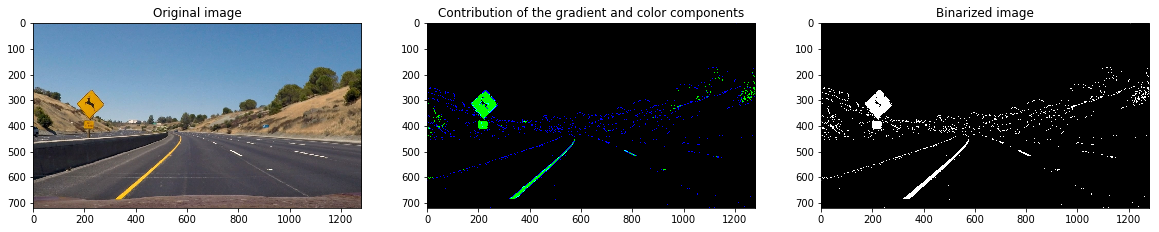

In [20]:
#OPTIONAL : Create a figure for the write up
figure, ax = plt.subplots(1,3 , figsize=(20,10))
ax[0].imshow(image)
ax[0].set_title('Original image')
ax[1].imshow(contribs)
ax[1].set_title('Contribution of the gradient and color components')
ax[2].imshow(output, cmap= 'gray')
ax[2].set_title('Binarized image')

# We can see this image in the P2_writeup.md
figure.savefig('./output_images/contribs.jpg', transparent=True, bbox_inches = 'tight')
# See how the traffic sign looks slightly more flattened as a result of undistorsion

# Step 4 : Apply perspective transform

Warp binarized image

# Step 5 : Find lane boundaries

# Step 6 : Determine curvature

# Step 7 : Warp detected lanes to original image

# Step 8 :  Output